## DSCI-552 Homework 06

### Cassandra Man, USC ID #4731096972

In [1]:
# Import python libraries
import pandas as pd
import numpy as np
import seaborn as sn
from pandas import DataFrame
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.impute import SimpleImputer
from scipy.stats import variation
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import statistics
import warnings
import xgboost as xg
from sklearn.model_selection import GridSearchCV
from sklearn.tree import _tree
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

## 1. Tree-Based Methods

### A. Download the APS Failure data

In [2]:
# Load .csv files
df_train = pd.read_csv("../data/aps_failure_training_set.csv", skiprows=20, na_values="na")
df_test = pd.read_csv("../data/aps_failure_test_set.csv", skiprows=20, na_values="na")

In [3]:
# Preview train data
df_train.head()

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1   neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
2   neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3   neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4   neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0     0.0   

   ag_002  ...     ee_002    ee_003    ee_004    ee_005    ee_006    ee_007  \
0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0  157956.0   
1     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   81140.0   
2     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0  158022.0   
3     0.0  ...      240.0      46.0      58.0      44.0      10.0       0.0   
4     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0  311560.0   

     ee_008  ee_009  ef_000  eg_000  
0   73224.0     0.0     0.0     0.0  
1   97576.0  1500.0     0.0     0.0  
2   95128.0   514.0     0.0     0.0  
3       0.0     0.0     4.0    32.0  
4  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

In [4]:
# Preview test data
df_test.head()

class  aa_000  ab_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg      60     0.0    20.0    12.0     0.0     0.0     0.0     0.0   
1   neg      82     0.0    68.0    40.0     0.0     0.0     0.0     0.0   
2   neg   66002     2.0   212.0   112.0     0.0     0.0     0.0     0.0   
3   neg   59816     NaN  1010.0   936.0     0.0     0.0     0.0     0.0   
4   neg    1814     NaN   156.0   140.0     0.0     0.0     0.0     0.0   

   ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006    ee_007  \
0     0.0  ...    1098.0     138.0     412.0     654.0       78.0      88.0   
1     0.0  ...    1068.0     276.0    1620.0     116.0       86.0     462.0   
2     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0  153680.0   
3     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0  210074.0   
4     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0     482.0   

     ee_008  ee_009  ef_000  eg_000  
0       0.0     0.0     0.0     0.0  
1       0.0     0.0     0.0     0.0  
2     516.0     0.0     0.0     0.0  
3  281662.0  3232.0     0.0     0.0  
4      76.0     0.0     0.0     0.0  

[5 rows x 171 columns]

### B. Data Preparation

#### i. Research data imputation techniques, and select one to apply to data

There are different data imputation techniques available to deal with data with missing values.<br>
In **summary statistic substitution**, missing values are replaced with summary statistic values of the dataset such as the mean or median. The advantages of this method is that it is simple; however, this approach does not add new information to the dataset and may underestimate errors.<br>
Another approach is **model imputation**, where a machine learning model uses existing columns with complete data in order to predict values in a column with missing data, for example by using a regression model. An advantage of this imputation technique is that it will increase the bias of the dataset to a lesser degree than summary statistic substitution.<br>
A third approach is **semi-supervised learning** for data imputation. It is important to note that applying semi-supervised learning to data imputation is appropriate only if labels are missing from a small smaple size, rather than a large sample size.<br>
Another approach is **maximum likelihood imputation**. In this method, a maximum likelihood estimator is build from the records with complete data to predict that target variable with missing data. From the distribution created, we are then able to draw values for records with missing data. <br>
Lastly, the **multiple imputation** method generates missing values from the dataset multiple times and pooled to create a resulting imputed value.<br>
<br>**The next steps will use mean imputation for our data.**

In [5]:
# Convert label
# if class = neg --> class = 0; if class = pos --> class = 1
class_label_train = []
for x in df_train["class"]:
    if x == "neg":
        class_label_train.append(0)
    else:
        class_label_train.append(1)
df_train.drop("class",1, inplace=True)
df_train["class"] = class_label_train

class_label_test = []
for x in df_test["class"]:
    if x == "neg":
        class_label_test.append(0)
    else:
        class_label_test.append(1)
df_test.drop("class",1, inplace=True)
df_test["class"] = class_label_test

In [6]:
# Get column names
train_columns = df_train.columns
test_columns = df_test.columns

In [7]:
# Mean Imputation
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df_train)
df_train = pd.DataFrame(imp.transform(df_train))
df_train.columns = train_columns
df_test = pd.DataFrame(imp.transform(df_test))
df_test.columns = test_columns

In [8]:
# Check imputed train data
df_train.head()

aa_000    ab_000        ac_000         ad_000  ae_000  af_000  ag_000  \
0  76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0     0.0   
1  33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0     0.0   
2  41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0     0.0   
3     12.0  0.000000  7.000000e+01      66.000000     0.0    10.0     0.0   
4  60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0     0.0   

   ag_001  ag_002  ag_003  ...    ee_003    ee_004    ee_005    ee_006  \
0     0.0     0.0     0.0  ...  493384.0  721044.0  469792.0  339156.0   
1     0.0     0.0     0.0  ...  178064.0  293306.0  245416.0  133654.0   
2     0.0     0.0     0.0  ...  159812.0  423992.0  409564.0  320746.0   
3     0.0     0.0   318.0  ...      46.0      58.0      44.0      10.0   
4     0.0     0.0     0.0  ...  229790.0  405298.0  347188.0  286954.0   

     ee_007    ee_008  ee_009  ef_000  eg_000  class  
0  157956.0   73224.0     0.0     0.0     0.0    0.0  
1   81140.0   97576.0  1500.0     0.0     0.0    0.0  
2  158022.0   95128.0   514.0     0.0     0.0    0.0  
3       0.0       0.0     0.0     4.0    32.0    0.0  
4  311560.0  433954.0  1218.0     0.0     0.0    0.0  

[5 rows x 171 columns]

In [9]:
# Check imputed test data
df_test.head()

aa_000    ab_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  ag_002  \
0     60.0  0.000000    20.0    12.0     0.0     0.0     0.0     0.0     0.0   
1     82.0  0.000000    68.0    40.0     0.0     0.0     0.0     0.0     0.0   
2  66002.0  2.000000   212.0   112.0     0.0     0.0     0.0     0.0     0.0   
3  59816.0  0.713189  1010.0   936.0     0.0     0.0     0.0     0.0     0.0   
4   1814.0  0.713189   156.0   140.0     0.0     0.0     0.0     0.0     0.0   

     ag_003  ...    ee_003    ee_004    ee_005     ee_006    ee_007    ee_008  \
0    2682.0  ...     138.0     412.0     654.0       78.0      88.0       0.0   
1       0.0  ...     276.0    1620.0     116.0       86.0     462.0       0.0   
2  199486.0  ...  380368.0  440134.0  269556.0  1315022.0  153680.0     516.0   
3       0.0  ...  243270.0  483302.0  485332.0   431376.0  210074.0  281662.0   
4       0.0  ...    4144.0   18466.0   49782.0     3176.0     482.0      76.0   

   ee_009  ef_000  eg_000  class  
0     0.0     0.0     0.0    0.0  
1     0.0     0.0     0.0    0.0  
2     0.0     0.0     0.0    0.0  
3  3232.0     0.0     0.0    0.0  
4     0.0     0.0     0.0    0.0  

[5 rows x 171 columns]

#### ii. For each of the 170 features, calculate the coefficient of variation CV = s/m , where s is sample standard deviation and m is sample mean

In [10]:
# Loop through columns to calculate CV for each feature
cv_list = []
feature_list = []
df_train_features = df_train.iloc[: , :-1]
for column in df_train_features:
    curr_col = df_train[column]
    col_mean = statistics.mean(curr_col)
    col_sd = statistics.stdev(curr_col)
    col_cv = col_sd/col_mean
    cv_list.append(col_cv)
    feature_list.append(column)

feature_cv = pd.DataFrame()
feature_cv["Feature"] = feature_list
feature_cv["CV"] = cv_list
feature_cv

Feature          CV
0    aa_000    2.450938
1    ab_000    2.328400
2    ac_000    2.169767
3    ad_000  183.847620
4    ae_000   23.190937
..      ...         ...
165  ee_007    4.962483
166  ee_008    3.222010
167  ee_009    5.626979
168  ef_000   47.124953
169  eg_000   40.553250

[170 rows x 2 columns]

#### iii. Plot the correlation matrix for features

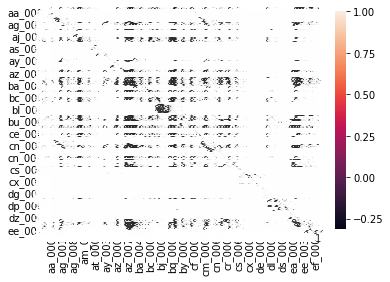

In [11]:
# Correlation matrix
correlation_matrix = df_train_features.corr()
sn.heatmap(correlation_matrix, annot=True)
plt.show()

#### iv. Pick ⌊ sqrt 170⌋ features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots

In [12]:
# Select 13 features with highest CV
feature_cv.sort_values(by=["CV"], inplace=True, ascending=False)
top_features = feature_cv[:13]
top_features

Feature          CV
122  cs_009  235.277605
91   cf_000  184.233092
109  co_000  183.949017
3    ad_000  183.847620
136  dh_000  114.984991
138  dj_000  109.647285
6    ag_000   91.878565
27   as_000   86.416904
41   ay_009   83.786063
51   az_009   76.967978
19   ak_000   74.526688
29   au_000   68.160554
93   ch_000   58.268229

In [13]:
# Select from original dataframe
feature_num_list = (top_features["Feature"]).to_list()
str_feature_num_list = []
for x in feature_num_list:
    str_feature_num_list.append(str(x))
df_topfeatures = df_train_features[str_feature_num_list]
df_topfeatures

cs_009         cf_000         co_000         ad_000  dh_000  dj_000  \
0         0.0       2.000000     220.000000     280.000000     0.0     0.0   
1         0.0  190221.810984  190515.566938  190620.639314     0.0     0.0   
2         0.0       0.000000       0.000000     100.000000     0.0     0.0   
3         0.0       2.000000       2.000000      66.000000     0.0     0.0   
4         0.0       0.000000     202.000000     458.000000     0.0     0.0   
...       ...            ...            ...            ...     ...     ...   
59995     0.0       0.000000     224.000000     186.000000     0.0     0.0   
59996     0.0       2.000000       0.000000     224.000000     0.0     0.0   
59997     0.0       2.000000       0.000000      18.000000     0.0     0.0   
59998     0.0       2.000000     580.000000     494.000000   190.0     0.0   
59999     0.0       0.000000       6.000000     628.000000     0.0     0.0   

       ag_000  as_000  ay_009  az_009  ak_000  au_000    ch_000  
0         0.0     0.0     0.0     0.0     0.0     0.0  0.000000  
1         0.0     0.0     0.0     0.0     0.0     0.0  0.000443  
2         0.0     0.0     0.0     0.0     0.0     0.0  0.000000  
3         0.0     0.0     0.0     0.0     0.0     0.0  0.000000  
4         0.0     0.0     0.0     0.0     0.0     0.0  0.000000  
...       ...     ...     ...     ...     ...     ...       ...  
59995     0.0     0.0     0.0     0.0     0.0     0.0  0.000000  
59996     0.0     0.0     0.0     0.0     0.0     0.0  0.000000  
59997     0.0     0.0     0.0     0.0     0.0     0.0  0.000000  
59998     0.0     0.0     0.0     0.0     0.0     0.0  0.000000  
59999     0.0     0.0     0.0     0.0     0.0     0.0  0.000000  

[60000 rows x 13 columns]

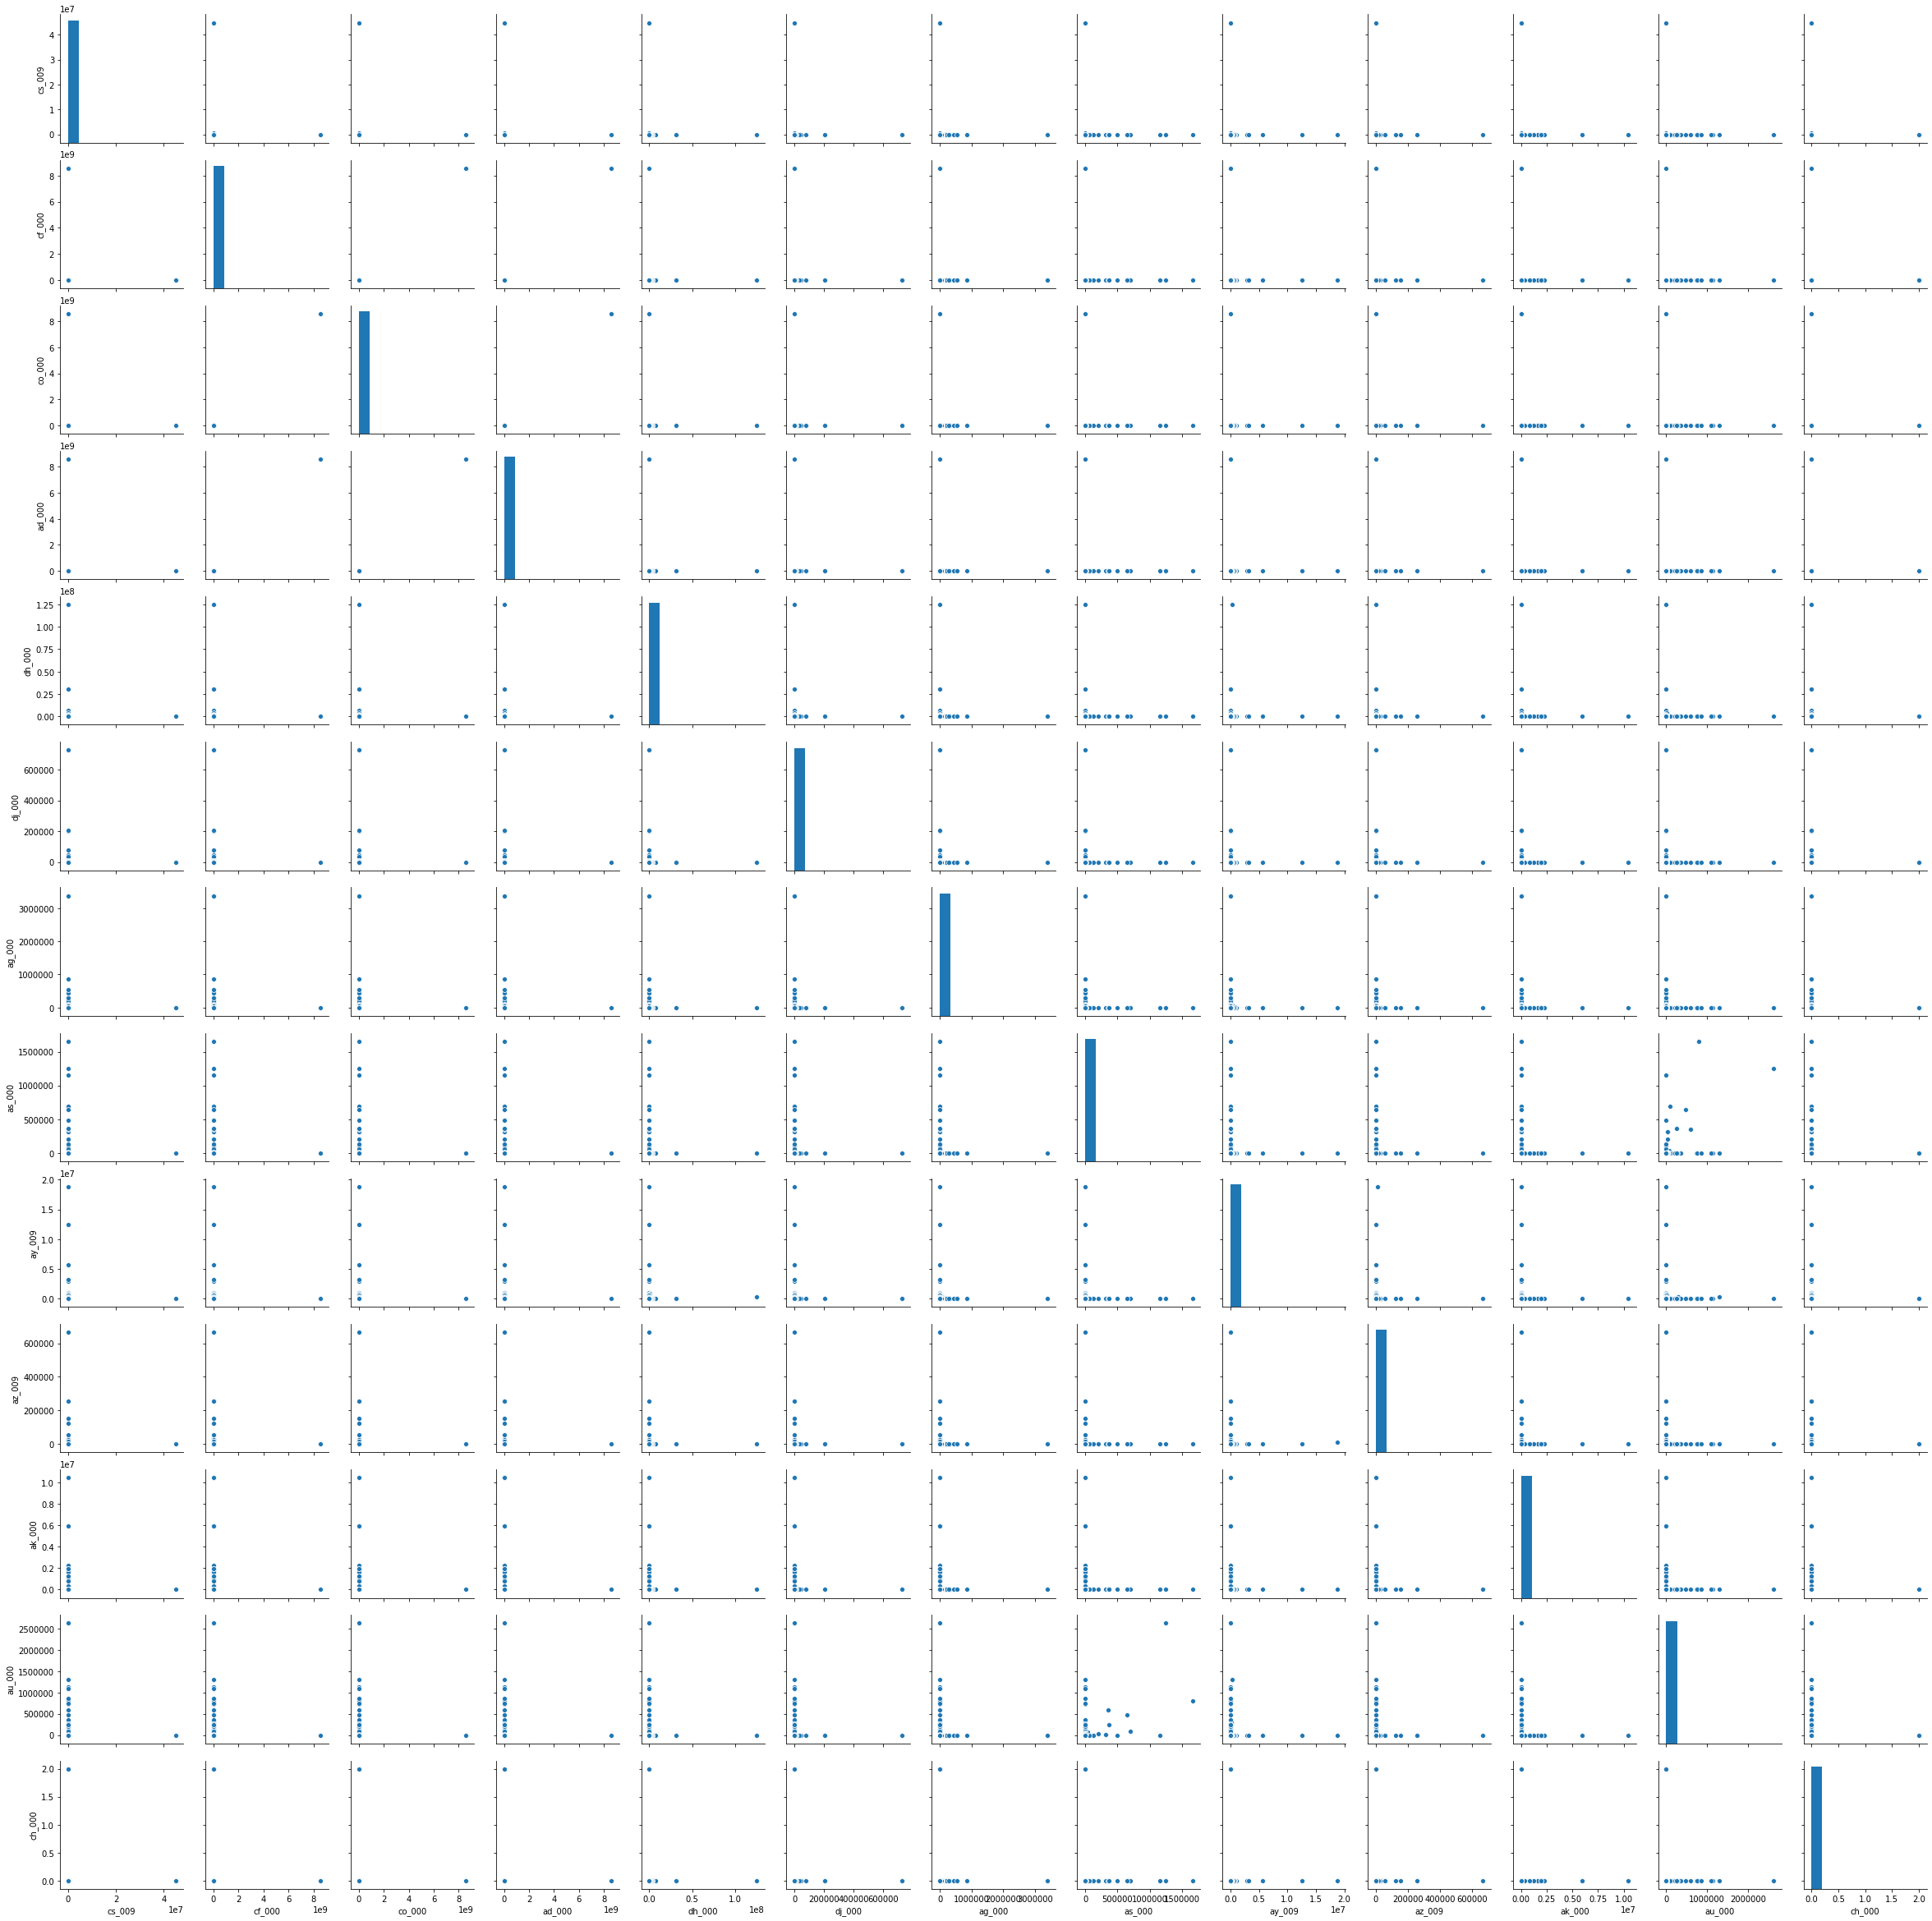

In [14]:
# Scatterplot
sn.pairplot(df_topfeatures)

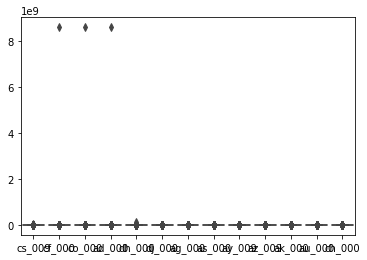

In [15]:
# Boxplot
sn.boxplot(data=df_topfeatures)

We cannot draw conclusions about the significance of the selected features visually from the scatterplots. Visually, from the scatterplot we can see that many feature appear to take binary values, although this does not indicate how significant each feature is.

#### v. Determine the number of positive and negative data. Is this data set imbalanced?

In [16]:
# Loop through dataset to determine number of positive (class = 1) and negative (class = 0) records 
positive_count_train = 0
negative_count_train = 0
positive_count_test = 0
negative_count_test = 0

for x in df_train["class"]:
    if x == 0:
        negative_count_train += 1
    else:
        positive_count_train += 1
        
for x in df_test["class"]:
    if x == 0:
        negative_count_test += 1
    else:
        positive_count_test += 1
print("Number of positive in train data: " + str(positive_count_train))
print("Number of negative in train data: " + str(negative_count_train))
print("Number of positive in test data: " + str(positive_count_test))
print("Number of negative in test data: " + str(negative_count_test))

Number of positive in train data: 1000
Number of negative in train data: 59000
Number of positive in test data: 375
Number of negative in test data: 15625


Both the train and test datasets are imbalanced. There is a much higher proportion of negative data than positive data.

### C. Train a random forest to classify the data set

In [17]:
# Split data into x and y
x_train = df_train_features
y_train = df_train.iloc[: ,-1:]
x_test = df_test.iloc[: , :-1]
y_test = df_test.iloc[: ,-1:]

In [18]:
# Create random forest classifier
rfc = RandomForestClassifier(oob_score=True) 
 
# Fit model to training data
rfc.fit(x_train, y_train)
 
# Predict y
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


#### Training Confusion Matrix

In [19]:
# Get confusion matrix
cf_train = confusion_matrix(y_train, y_pred_train)
print("Confusion matrix:")
print(cf_train)

Confusion matrix:
[[59000     0]
 [    0  1000]]


#### Training AUC 

In [20]:
# Compute AUC
auc_train = roc_auc_score(y_train, y_pred_train, average='micro')
print("The AUC is:") 
print(auc_train)

The AUC is:
1.0


#### Training Misclassification

In [21]:
# Compute misclassification
misclass_train = 1 - rfc.score(x_train, y_train)
print("The misclassification is:") 
print(misclass_train)

The misclassification is:
0.0


#### Training ROC

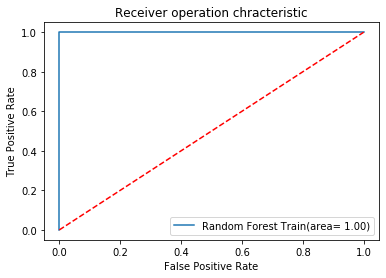

In [22]:
# Plot ROC
n_classes = ["negative", "positive"]
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train, pos_label=1)
roc_auc_train = roc_auc_score(y_train, y_pred_train)

plt.figure()
plt.plot(fpr_train, tpr_train, label="Random Forest Train(area= %0.2f)" % roc_auc_train)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### Test Confusion Matrix

In [23]:
# Get confusion matrix
cf_test = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix:")
print(cf_test)

Confusion matrix:
[[15609    16]
 [  106   269]]


#### Test AUC 

In [24]:
# Compute AUC
auc_test = roc_auc_score(y_test, y_pred_test, average='micro')
print("The AUC is:") 
print(auc_test)

The AUC is:
0.8581546666666666


#### Test Misclassification 

In [25]:
# Compute misclassifcation 
misclass_test = 1 - rfc.score(x_test, y_test)
print("The misclassification is:") 
print(misclass_test)

The misclassification is:
0.007624999999999993


#### Test ROC 

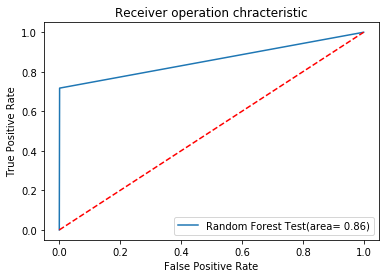

In [26]:
# Plot ROC
n_classes = ["negative", "positive"]
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test, pos_label=1)
roc_auc_test = roc_auc_score(y_test, y_pred_test)

plt.figure()
plt.plot(fpr_test, tpr_test, label="Random Forest Test(area= %0.2f)" % roc_auc_test)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### Out of Bag error 

In [27]:
oob_error = 1 - rfc.oob_score_
print("The Out of Bag Error is:") 
print(oob_error)

The Out of Bag Error is:
0.006233333333333313


The Out of Bag error was determined to be 0.006233333333333313, and the test error was 0.007624999999999993. The Out of Bag error and test error are similar, with Out of Bag error being slighly less than the test error.

### D. Research how class imbalance is addressed in random forests. Compensate for class imbalance in the random forest and repeat 1c; compare results.

The random forest model is sensitive to class imbalance, as the individual decision trees that it is composed of are sensitive to class imbalance. Each tree in a random forest model is selected as a random sample with replacement from the data, so if the data has class imbalance we would expected each bag (and each tree) to also have the same bias. <br>

There are three techniques to address class imbalance in random forests.<br>
The first technique is **ensemble cross-validation**, in which the dataset is divided into subsets and in each cross-validation, all subsets except for one are used to train the model and the remaining subset is used to validate the model. The resulting prediction probabilities are averaged.<br>
The second tecnique is **cost-sensitive learning**, in which we set a cost penalty on minority class misclassification by assigning a higher weight to the minority class.<br>
The third technique is to **over-predict a label**, where we penalize the model by varying amounts so that it will overpredict for a certain class. <br>
**We will use the second technique and adjust the weights inversely proportional to class frequencies.**

In [28]:
# Create random forest model with adjusted weights for class balance
rfc_b = RandomForestClassifier(oob_score=True, class_weight="balanced") 

# Fit model to training data
rfc_b.fit(x_train, y_train)
 
# Predict y
y_pred_train_b = rfc_b.predict(x_train)
y_pred_test_b = rfc_b.predict(x_test)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


#### Training Confusion Matrix - Class Imbalance Compensated Model

In [29]:
# Get confusion matrix
cf_train_b = confusion_matrix(y_train, y_pred_train_b)
print("Confusion matrix:")
print(cf_train_b)

Confusion matrix:
[[59000     0]
 [    0  1000]]


#### Training AUC - Class Imbalance Compensated Model

In [30]:
# Compute AUC
auc_train_b = roc_auc_score(y_train, y_pred_train_b, average='micro')
print("The AUC is:") 
print(auc_train_b)

The AUC is:
1.0


#### Training Misclassification - Class Imbalance Compensated Model

In [31]:
# Compute misclassification
misclass_train_b = 1 - rfc_b.score(x_train, y_train)
print("The misclassification is:") 
print(misclass_train_b)

The misclassification is:
0.0


#### Training ROC - Class Imbalance Compensated Model

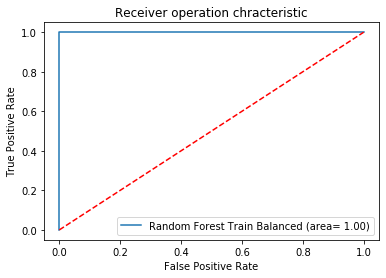

In [32]:
# Plot ROC
n_classes = ["negative", "positive"]
fpr_train_b, tpr_train_b, _ = roc_curve(y_train, y_pred_train_b, pos_label=1)
roc_auc_train_b = roc_auc_score(y_train, y_pred_train_b)

plt.figure()
plt.plot(fpr_train_b, tpr_train_b, label="Random Forest Train Balanced (area= %0.2f)" % roc_auc_train_b)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### Test Confusion Matrix - Class Imbalance Compensated Model

In [33]:
# Get confusion matrix
cf_test_b = confusion_matrix(y_test, y_pred_test_b)
print("Confusion matrix:")
print(cf_test_b)

Confusion matrix:
[[15610    15]
 [  163   212]]


#### Test AUC - Class Imbalance Compensated Model

In [34]:
# Compute AUC
auc_test_b = roc_auc_score(y_test, y_pred_test_b, average='micro')
print("The AUC is:") 
print(auc_test_b)

The AUC is:
0.7821866666666667


#### Test Misclassification - Class Imbalance Compensated Model

In [35]:
# Compute misclassifcation 
misclass_test_b = 1 - rfc_b.score(x_test, y_test)
print("The misclassification is:") 
print(misclass_test_b)

The misclassification is:
0.011125000000000052


#### Test ROC - Class Imbalance Compensated Model

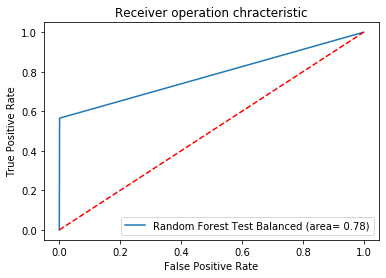

In [36]:
# Plot ROC
n_classes = ["negative", "positive"]
fpr_test_b, tpr_test_b, _ = roc_curve(y_test, y_pred_test_b, pos_label=1)
roc_auc_test_b = roc_auc_score(y_test, y_pred_test_b)

plt.figure()
plt.plot(fpr_test_b, tpr_test_b, label="Random Forest Test Balanced (area= %0.2f)" % roc_auc_test_b)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### Out of Bag error - Class Imbalance Compensated Model

In [37]:
oob_error_b = 1 - rfc_b.oob_score_
print("The Out of Bag Error is:") 
print(oob_error_b)

The Out of Bag Error is:
0.007816666666666694


We compare the class imbalanced compensated model to the original model in 1C. For training data, the class imbalance compensated model yielded the same perfect classification results as the original model. For test data, the class imbalance compensated model yielded an AUC of 0.7901226666666666, misclassification of 0.010874999999999968, and Out of Bag error 0.007816666666666694. When compared to the metrics for the original model with AUC 0.8567573333333333, misclassification 0.0078125, and Out of Bag error 0.006233333333333313, we see that the class imbalance compensated model did not perform as well as the original model, and in this case, balancing the classes did not improve performance but actually made it worse.

### E. XGBoost and Model Trees

In [38]:
# Create XGBoost Regression model with L1-penalized logistic regression
xgbreg = xg.XGBRegressor(objective ='binary:logistic')

In [39]:
# Create list of values for alpha to test using cross validation
alpha_list = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

In [40]:
# Find alpha with 5-fold CV
xgbreg_cv_a = GridSearchCV(estimator = xgbreg, param_grid = alpha_list, scoring='roc_auc',n_jobs=4, cv=5)
xgbreg_cv_a.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [41]:
# Select alpha value that gave best results 
selected_alpha = xgbreg_cv_a.best_params_.get("reg_alpha")
print(selected_alpha)

1


In [42]:
# Create XGBoost Regression model with selected alpha
params = {"objective":"binary:logistic",'alpha': selected_alpha}

# Train on APS data
data_dmatrix = xg.DMatrix(data=x_train,label=y_train)

# Use 5 fold cross validation to estimate error of trained model
xgb_cv = xg.cv(dtrain=data_dmatrix, params=params, nfold=5, metrics="error", as_pandas=True, seed=123)
xgb_cv.head()

train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.006671         0.000245         0.009183        0.000609
1          0.005983         0.000182         0.008517        0.000533
2          0.005588         0.000250         0.008333        0.000415
3          0.005200         0.000176         0.007950        0.000239
4          0.004850         0.000194         0.007983        0.000588

In [43]:
# Use XGBoost to get predictions
xgb_model = xg.XGBRegressor(objective = "binary:logistic",alpha = selected_alpha)
xgb_model.fit(x_train, y_train)
y_pred_train_xgb_prob1 = xgb_model.predict(x_train)
y_pred_test_xgb_prob1 = xgb_model.predict(x_test)
xgb_error = mean_squared_error(y_test, y_pred_test_xgb_prob1)
print("Test error:")
print(xgb_error)

Test error:
0.0048117701121622915


We read the estimated train error from the last row, as it represents the mean error from the last round of boosting. The error of the trained model was found to be 0.004850, and the test error was found to be 0.004812. The train and test errors similar in value, with test error being only slightly lower.

In [44]:
# Write function to convert probabilities outputted from xgb to binary labels
y_pred_train_xgb_prob1_list = y_pred_train_xgb_prob1.tolist()
y_pred_test_xgb_prob1_list = y_pred_test_xgb_prob1.tolist()

# Iterate through the lists of probabilities; if value < 0.5, assign to binary value 0, else assign to binary value 1
y_pred_train_xgb_list = []
for x in y_pred_train_xgb_prob1_list:
    if x<0.5:
        y_pred_train_xgb_list.append(0)
    else:
        y_pred_train_xgb_list.append(1)
        
y_pred_test_xgb_list = []
for x in y_pred_test_xgb_prob1_list:
    if x<0.5:
        y_pred_test_xgb_list.append(0)
    else:
        y_pred_test_xgb_list.append(1)

# Convert lists back to arrays
y_pred_train_xgb = np.array(y_pred_train_xgb_list)
y_pred_test_xgb = np.array(y_pred_test_xgb_list)

#### Training Confusion Matrix - L1 Logistic Regression

In [45]:
# Get confusion matrix
cf_train_log = confusion_matrix(y_train, y_pred_train_xgb)
print("Confusion matrix:")
print(cf_train_log)

Confusion matrix:
[[59000     0]
 [    1   999]]


#### Training AUC - L1 Logistic Regression

In [46]:
# Compute AUC
auc_train_log = roc_auc_score(y_train, y_pred_train_xgb, average='micro')
print("The AUC is:") 
print(auc_train_log)

The AUC is:
0.9995


#### Training ROC - L1 Logistic Regression

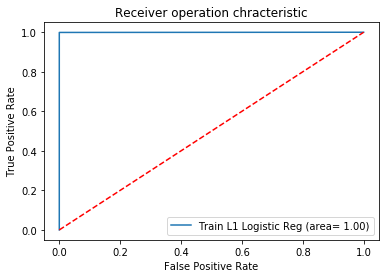

In [47]:
# Plot ROC
n_classes = ["negative", "positive"]
fpr_train_log, tpr_train_log, _ = roc_curve(y_train, y_pred_train_xgb, pos_label=1)
roc_auc_train_log = roc_auc_score(y_train, y_pred_train_xgb)

plt.figure()
plt.plot(fpr_train_log, tpr_train_log, label="Train L1 Logistic Reg (area= %0.2f)" % roc_auc_train_log)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### Test Confusion Matrix - L1 Logistic Regression

In [48]:
# Get confusion matrix
cf_test_log = confusion_matrix(y_test, y_pred_test_xgb)
print("Confusion matrix:")
print(cf_test_log)

Confusion matrix:
[[15610    15]
 [   83   292]]


#### Test AUC - L1 Logistic Regression

In [49]:
# Compute AUC
auc_test_log = roc_auc_score(y_test, y_pred_test_xgb, average='micro')
print("The AUC is:") 
print(auc_test_log)

The AUC is:
0.8888533333333334


#### Test ROC - L1 Logistic Regression

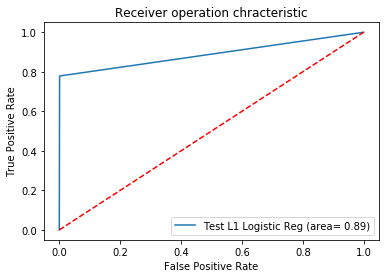

In [50]:
# Plot ROC
n_classes = ["negative", "positive"]
fpr_test_log, tpr_test_log, _ = roc_curve(y_test, y_pred_test_xgb, pos_label=1)
roc_auc_test_log = roc_auc_score(y_test, y_pred_test_xgb)

plt.figure()
plt.plot(fpr_test_log, tpr_test_log, label="Test L1 Logistic Reg (area= %0.2f)" % roc_auc_test_log)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

### F. SMOTE Preprocessing to Compensate for Class Imbalance

In [69]:
# Create pipeline with steps for SMOTE and the L1 penalized logistic regression model
xgb_model = xg.XGBRegressor(objective ='binary:logistic')
smote_step = SMOTE()
pipeline = Pipeline([('smote', smote_step),
                     ('xgb', xgb_model)])

In [70]:
stratified_kfold = StratifiedKFold(n_splits=5)

In [71]:
# Create model to cross validate to find alpha
param_grid = {'xgb__reg_alpha':[1e-2, 0.1, 1]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

In [72]:
# Fit model to data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE()),
                                       ('xgb',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     gamma=None, gpu_id=None,
                                                     grow_po...
       

In [73]:
# Get selected alpha from cross validation
smote_selected_alpha = grid_search.best_params_.get("xgb__reg_alpha")
print(smote_selected_alpha)

1


In [74]:
# New grid search with selected alpha to do 5 fold CV for estimate of errors
param_grid_alpha = {'xgb__reg_alpha': [smote_selected_alpha]}
grid_search_alpha = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid_alpha,
                           scoring='accuracy',
                           n_jobs=-1)
grid_search_alpha.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [nan]
  category=UserWarning


GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE()),
                                       ('xgb',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     gamma=None, gpu_id=None,
                                                     grow_policy=None,
                                                     importance_type=None,
    

In [75]:
# Use XGBoost to get predictions
y_pred_train_smote_prob1 = grid_search_alpha.predict(x_train)
y_pred_test_smote_prob1 = grid_search_alpha.predict(x_test)

In [76]:
# Write function to convert probabilities outputted from xgb to binary labels
y_pred_train_smote_prob1_list = y_pred_train_smote_prob1.tolist()
y_pred_test_smote_prob1_list = y_pred_test_smote_prob1.tolist()

# Iterate through the lists of probabilities; if value < 0.5, assign to binary value 0, else assign to binary value 1
y_pred_train_smote_list = []
for x in y_pred_train_smote_prob1_list:
    if x<0.5:
        y_pred_train_smote_list.append(0)
    else:
        y_pred_train_smote_list.append(1)
        
y_pred_test_smote_list = []
for x in y_pred_test_smote_prob1_list:
    if x<0.5:
        y_pred_test_smote_list.append(0)
    else:
        y_pred_test_smote_list.append(1)

# Convert lists back to arrays
y_pred_train_smote = np.array(y_pred_train_smote_list)
y_pred_test_smote = np.array(y_pred_test_smote_list)

In [79]:
smote_error_test = mean_squared_error(y_test, y_pred_test_smote_prob1)
print("Test error:")
print(smote_error_test)

Test error:
0.005593904936289178


In [80]:
smote_error_train = mean_squared_error(y_train, y_pred_train_smote_prob1)
print("Train error:")
print(smote_error_train)

Train error:
6.763879033882058e-05


Comparing the result of the uncompensated model and the SMOTE model, the error of the trained model was found to be 6.763879033882058e-05, and the test error was found to be 0.005593904936289178. The train error of the SMOTE model is signficantly smaller than the train error of the uncompensated model, which was 0.004850. The test error, on the other hand, of the SMOTE model is greater than the test error for the uncompensated model, which was 0.004812.

#### Training Confusion Matrix - SMOTE

In [81]:
# Get confusion matrix
cf_train_smote = confusion_matrix(y_train, y_pred_train_smote)
print("Confusion matrix:")
print(cf_train_smote)

Confusion matrix:
[[59000     0]
 [    2   998]]


#### Training AUC - SMOTE

In [82]:
# Compute AUC
auc_train_smote = roc_auc_score(y_train, y_pred_train_smote, average='micro')
print("The AUC is:") 
print(auc_train_smote)

The AUC is:
0.999


#### Training ROC - SMOTE

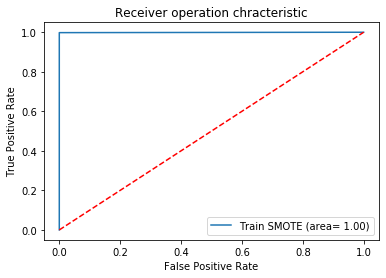

In [83]:
# Plot ROC
n_classes = ["negative", "positive"]
fpr_train_smote, tpr_train_smote, _ = roc_curve(y_train, y_pred_train_smote, pos_label=1)
roc_auc_train_smote = roc_auc_score(y_train, y_pred_train_smote)

plt.figure()
plt.plot(fpr_train_smote, tpr_train_smote, label="Train SMOTE (area= %0.2f)" % roc_auc_train_smote)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

#### Test Confusion Matrix - SMOTE

In [84]:
# Get confusion matrix
cf_test_smote = confusion_matrix(y_test, y_pred_test_smote)
print("Confusion matrix:")
print(cf_test_smote)

Confusion matrix:
[[15576    49]
 [   62   313]]


#### Test AUC - SMOTE

In [85]:
# Compute AUC
auc_test_smote = roc_auc_score(y_test, y_pred_test_smote, average='micro')
print("The AUC is:") 
print(auc_test_smote)

The AUC is:
0.9157653333333333


#### Test ROC - SMOTE

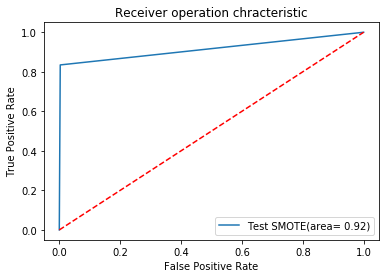

In [86]:
# Plot ROC
n_classes = ["negative", "positive"]
fpr_test_smote, tpr_test_smote, _ = roc_curve(y_test, y_pred_test_smote, pos_label=1)
roc_auc_test_smote = roc_auc_score(y_test, y_pred_test_smote)

plt.figure()
plt.plot(fpr_test_smote, tpr_test_smote, label="Test SMOTE(area= %0.2f)" % roc_auc_test_smote)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operation chracteristic")
plt.legend(loc="lower right")

plt.show()

### ISLR 6.6.3

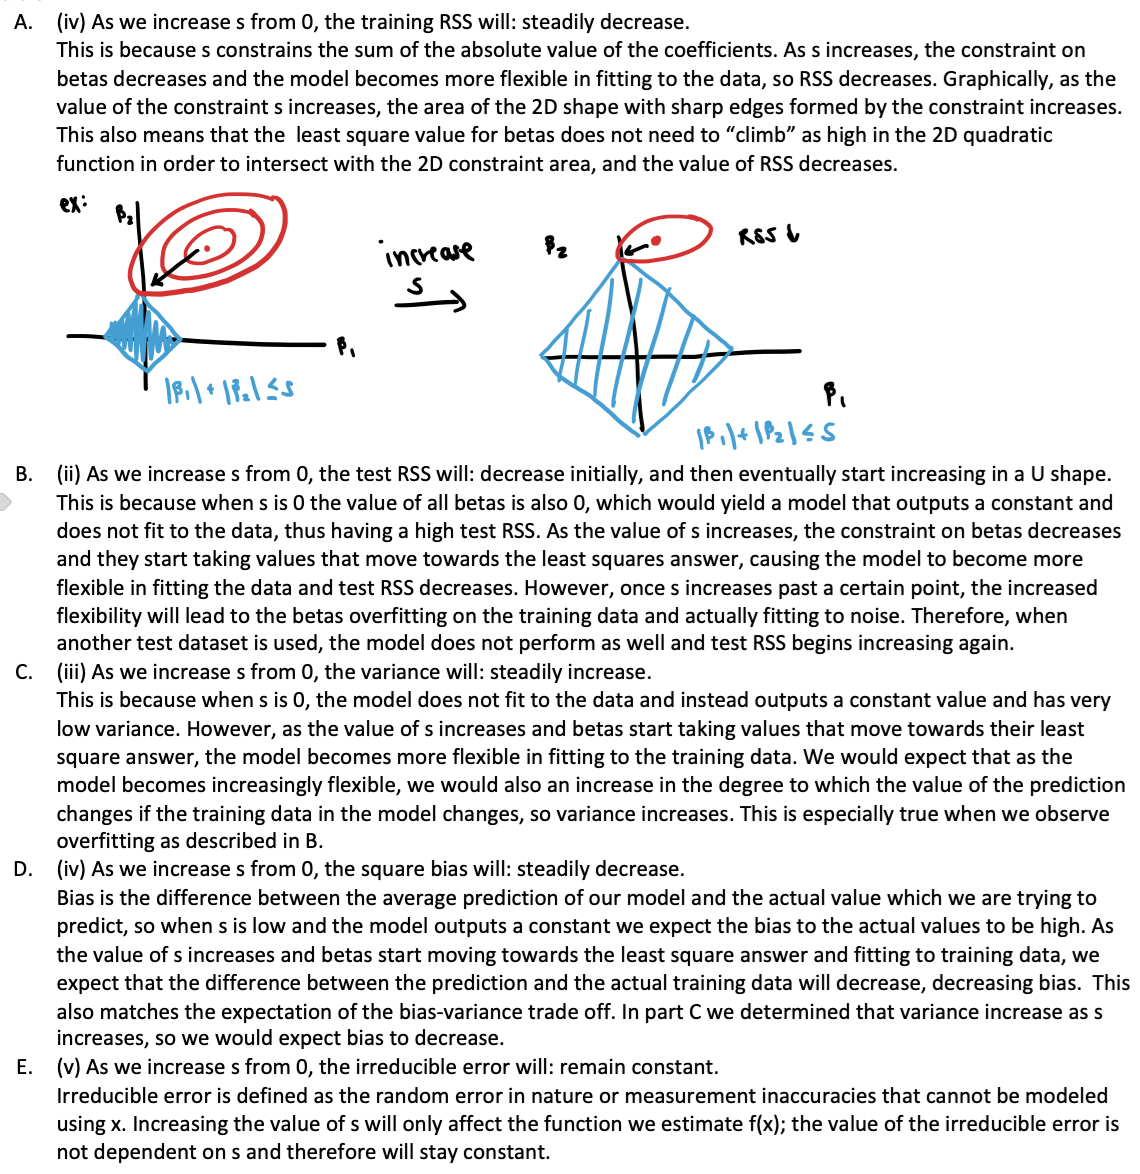

### ISLR 6.6.5

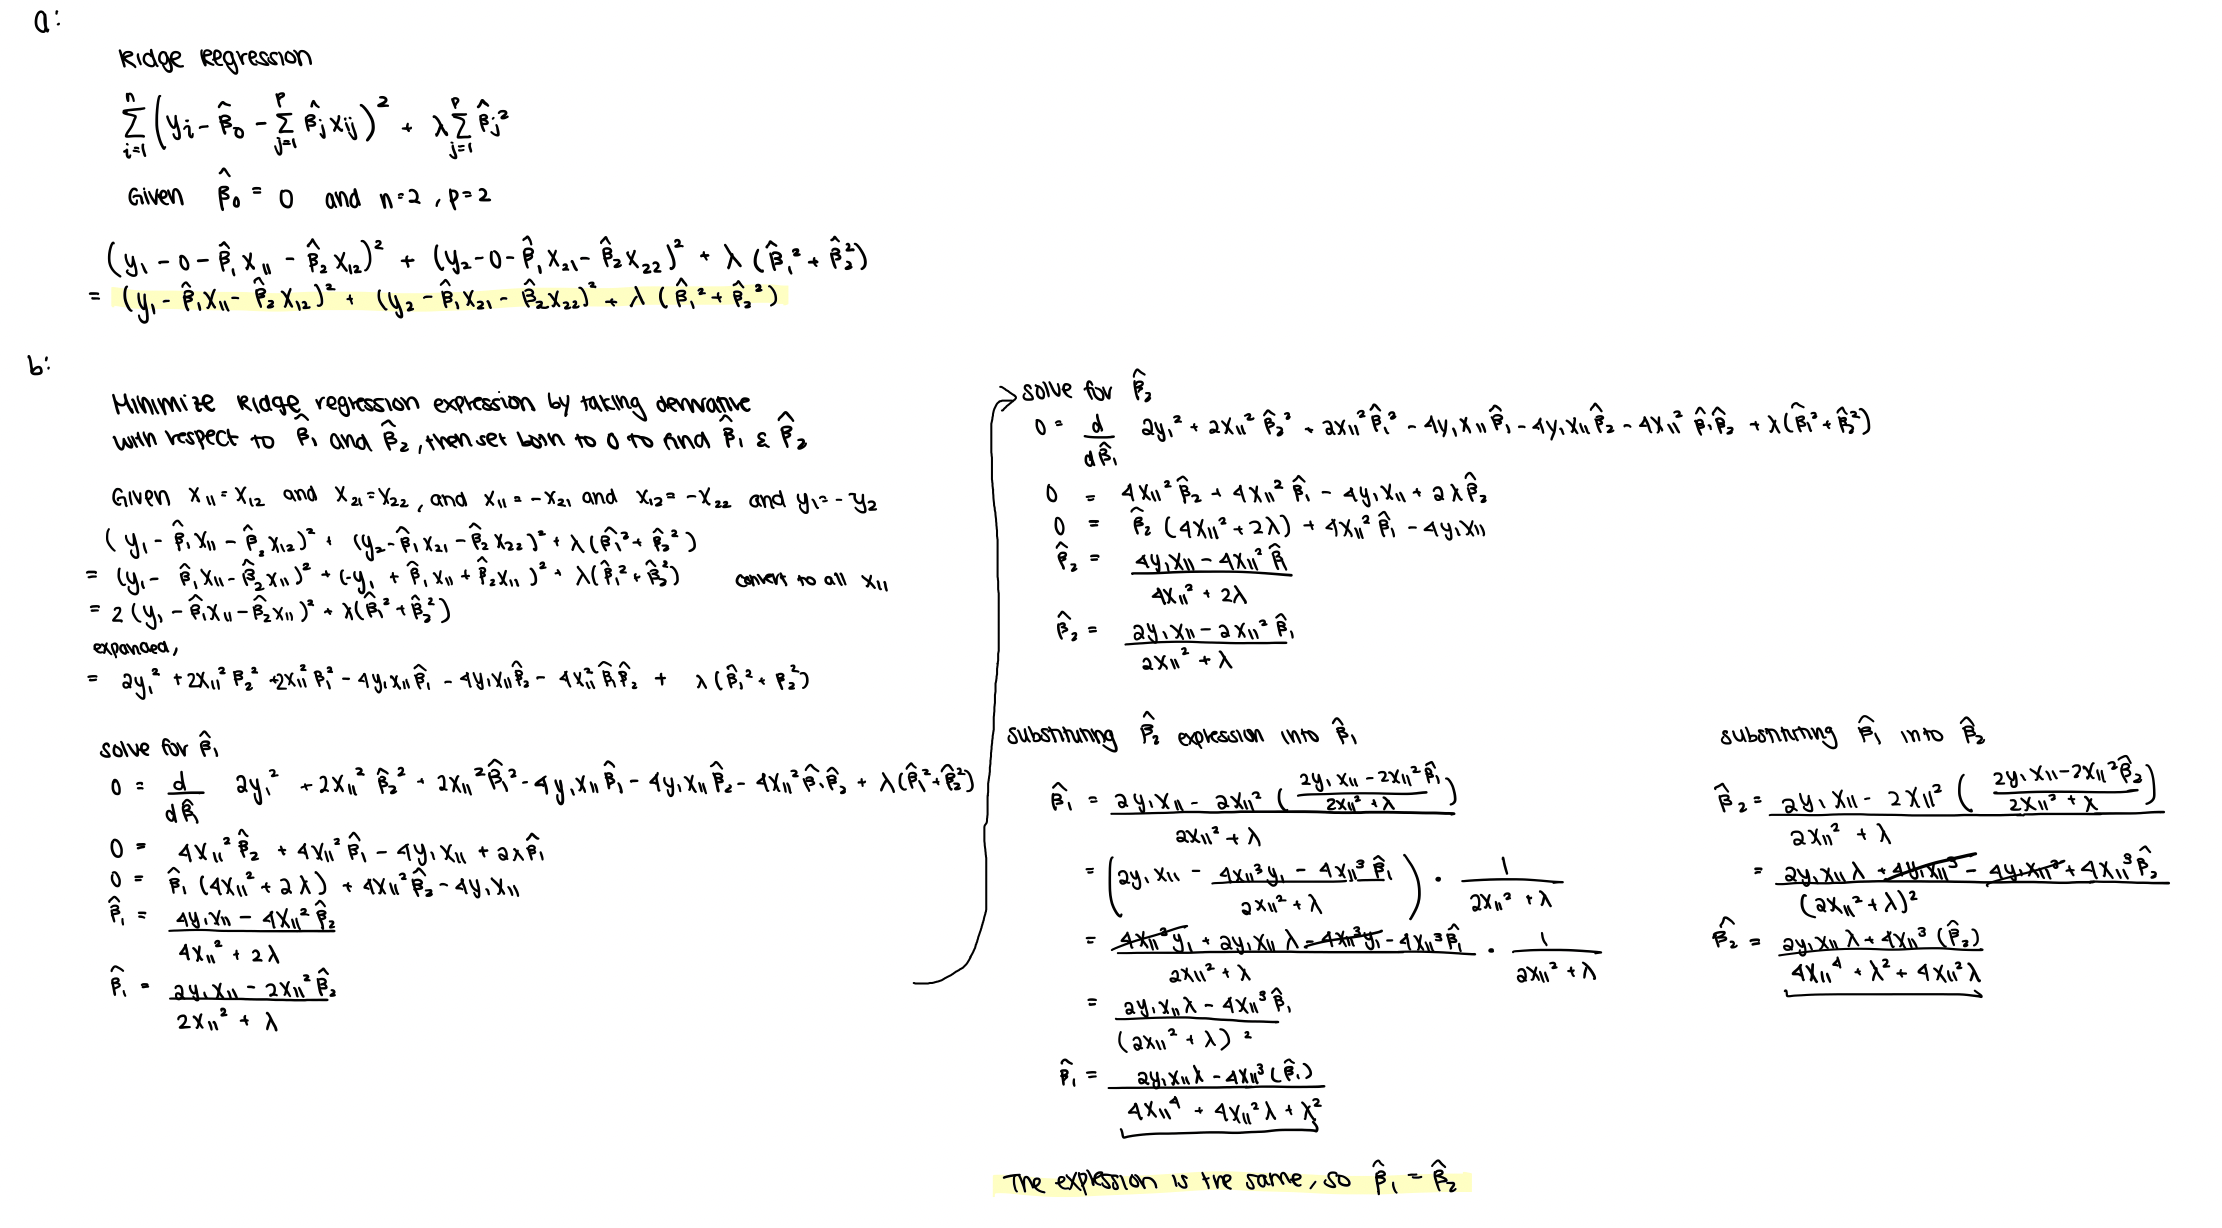

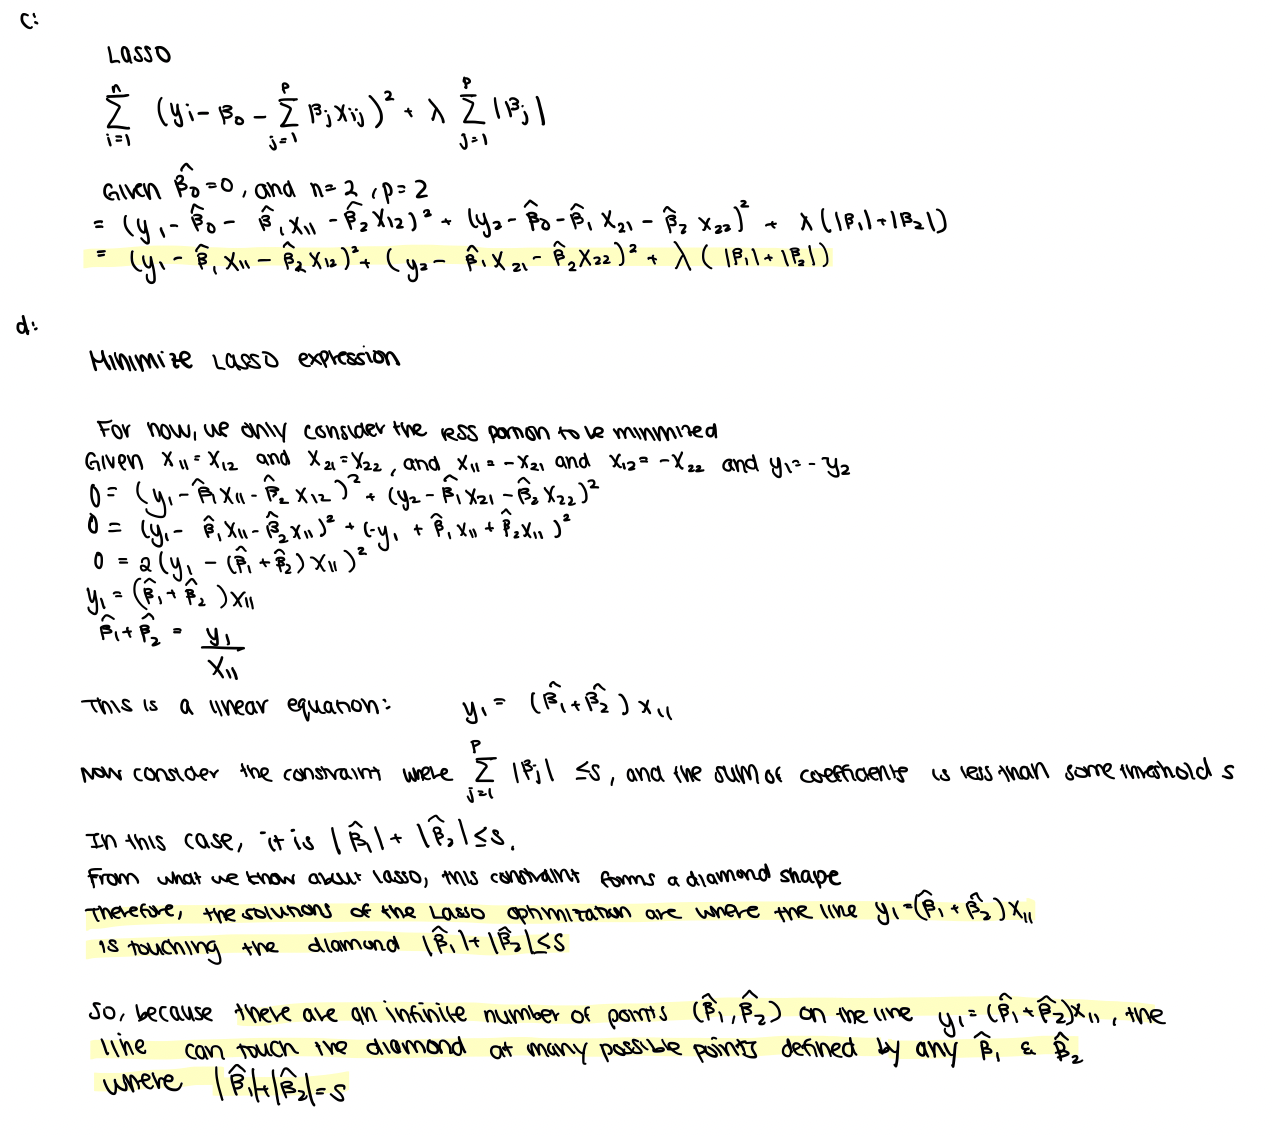

### ISLR 8.4.5

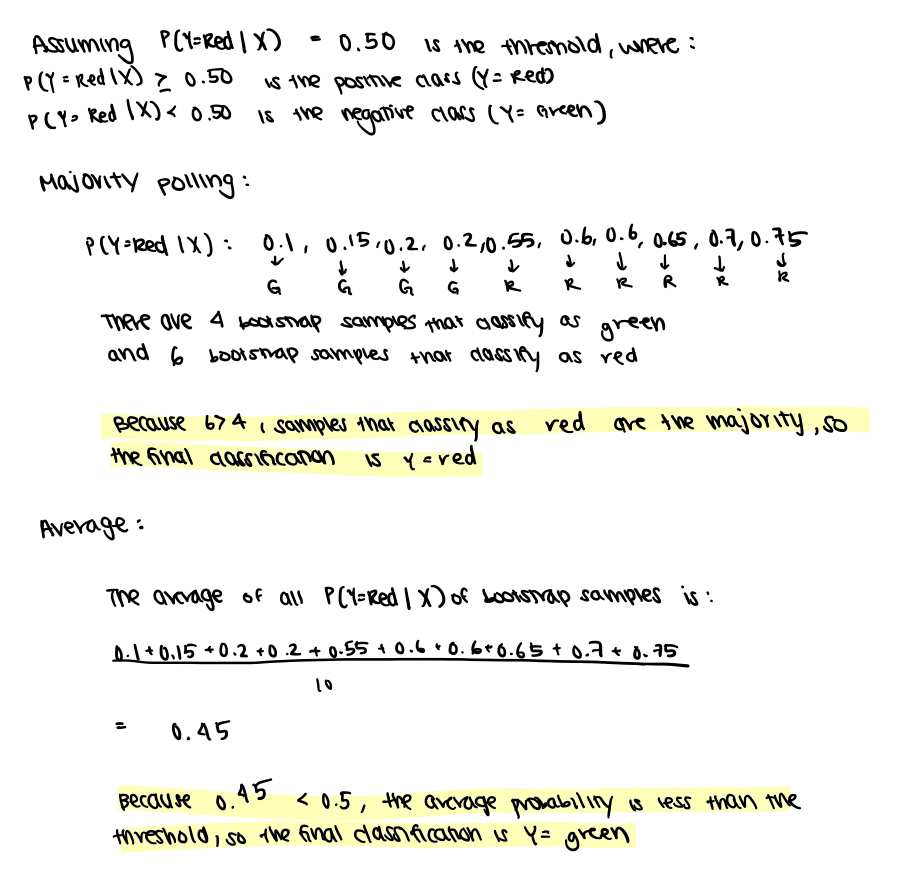

### ISLR 9.7.3

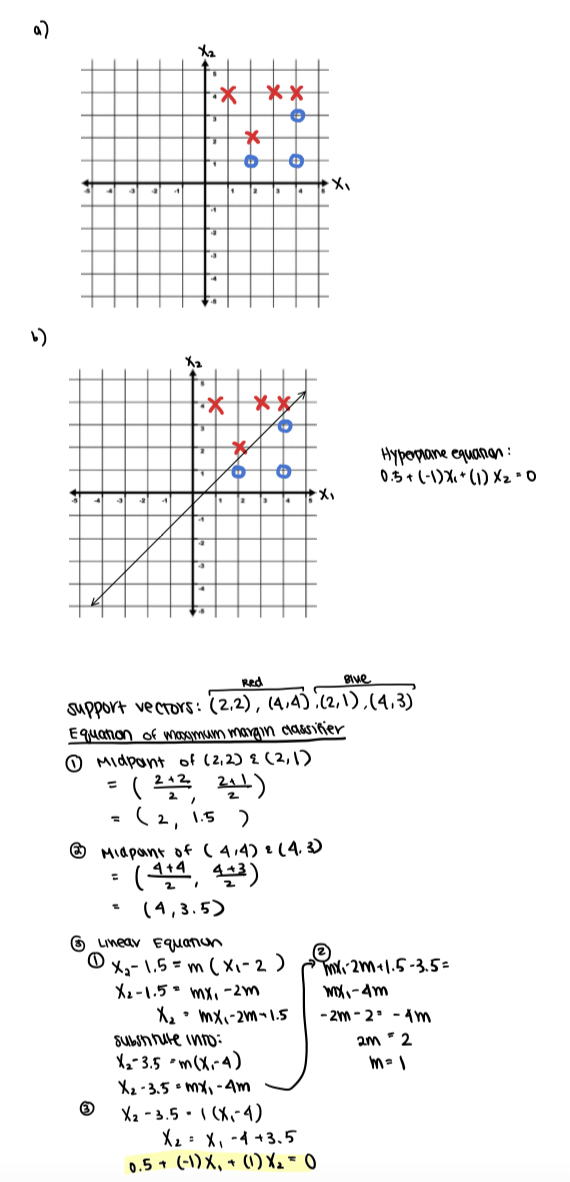

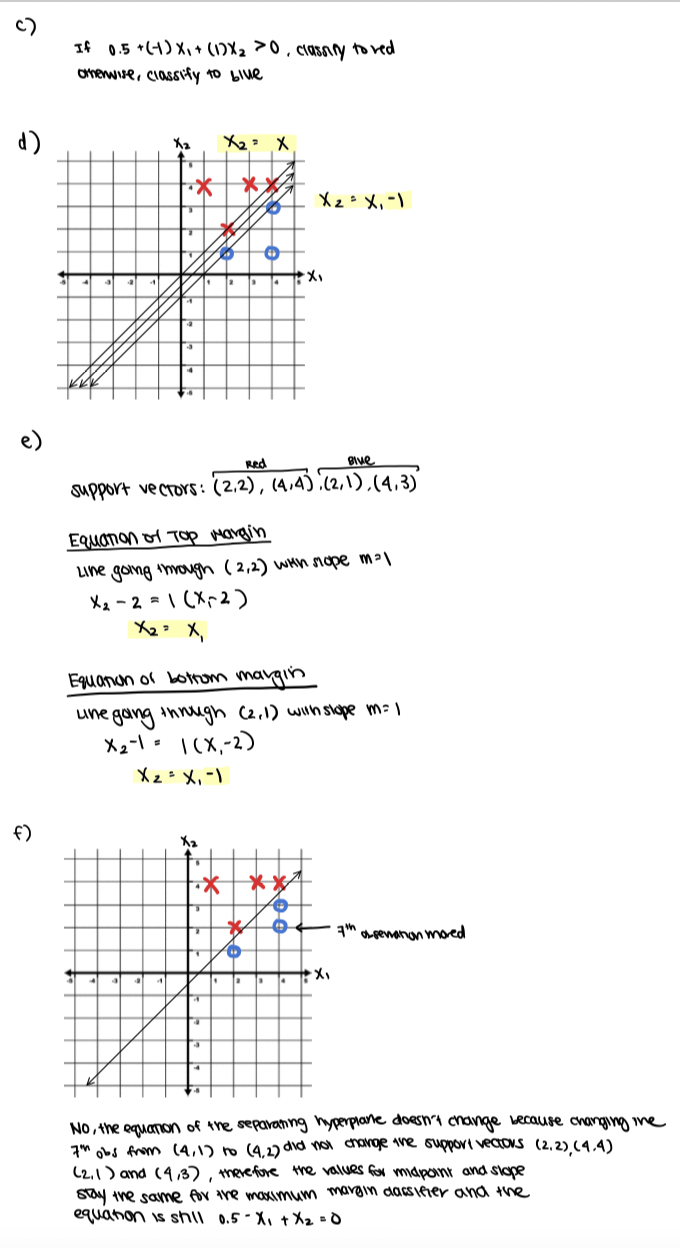

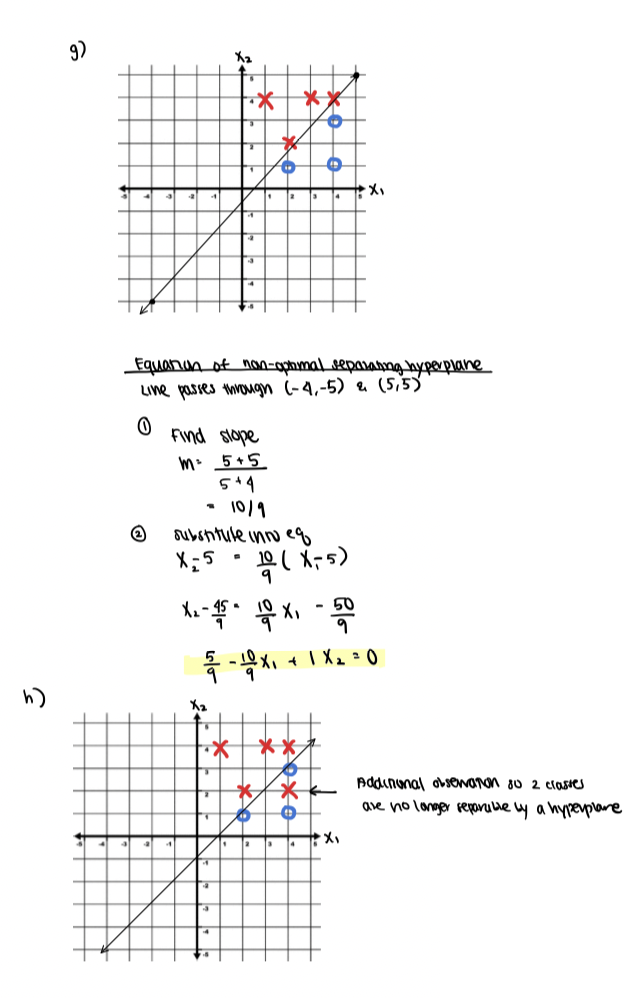

### Works Cited

1. Data imputation techniques
https://www.kaggle.com/code/residentmario/simple-techniques-for-missing-data-imputation/notebook
2. Class imbalance in random forest model
https://stats.stackexchange.com/questions/242833/is-random-forest-a-good-option-for-unbalanced-data-classification
https://towardsdatascience.com/working-with-highly-imbalanced-datasets-in-machine-learning-projects-c70c5f2a7b16
https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52eb
3. Pipeline with SMOTE
https://stackoverflow.com/questions/48370150/how-to-implement-smote-in-cross-validation-and-gridsearchcv